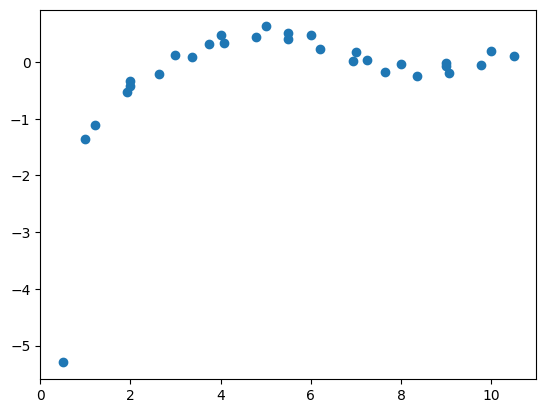

In [187]:
import numpy as np
import matplotlib.pyplot as plt
# Simulate data from a special function
# You don't have to understand the next 4 lines
from scipy.special import yn as secret_function
x = np.hstack([np.linspace(1, 10, 10), np.linspace(2, 9, 5), np.linspace(.5, 10.5, 15)])
offset = np.linspace(.3, 0, 30)
y = secret_function(2, x) + offset

# final data variable
points = np.vstack([x, y]).T

# Domain of the data, to help with plotting later on
plot_lims_x = [0, 11]
plot_lims_y = [-2, 1]

plt.scatter(x,y)

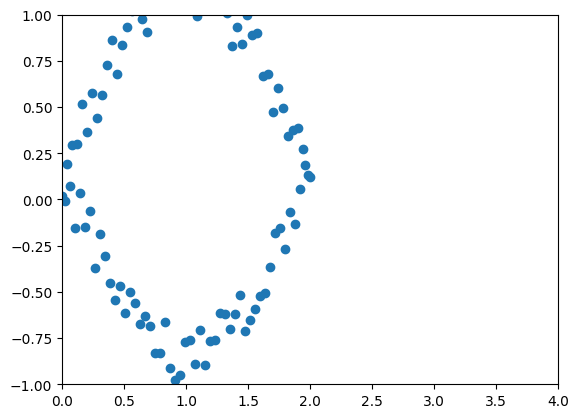

In [188]:
x = np.linspace(0,np.pi*2,100)
xlist = []
ylist =[]
for a in x:
    if a <= np.pi:
        y = np.sin(a) 
        ylist.append(y)
        xlist.append(a/np.pi*2)
    if a > np.pi:
        y = np.sin(a)
        ylist.append(y) 
        xlist.append((a-np.pi)/np.pi*2)
plot_lims_x = [0, 4]
plot_lims_y = [-1, 1]

offset = np.linspace(.3, 0, len(ylist))
np.random.shuffle(offset)
plt.scatter(xlist,ylist+ offset)

plt.xlim(plot_lims_x)
plt.ylim(plot_lims_y)

plt.show()

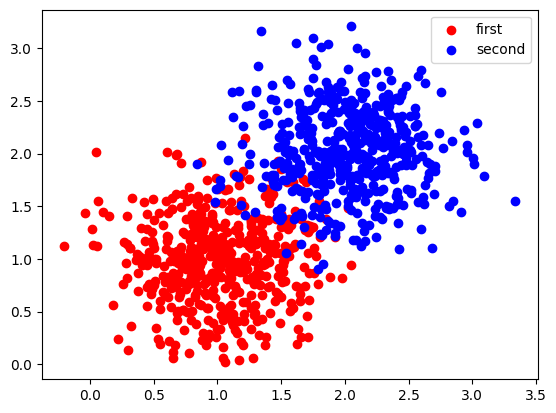

In [189]:
scale = 0.4

start = 1

amount = 500



data = np.concatenate((
np.hstack((
    np.vstack(np.random.normal(start, scale, amount)),
    np.vstack(np.random.normal(start, scale, amount))
    )),
np.hstack((
    np.vstack(np.random.normal(start+1, scale, amount)),
    np.vstack(np.random.normal(start+1, scale, amount))
    ))
    ))

plt.scatter(np.random.normal(start, scale, amount) ,np.random.normal(start, scale, amount),color="r",label="first")


plt.scatter(np.random.normal(start+1, scale, amount) ,np.random.normal(start+1, scale, amount),color="b",label="second")
plt.legend()

labels= np.hstack(([0]*amount,[1]*amount))

# print((data,labels))



# X, y = make_classification(
#     n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
# )
# print(y)

# clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=10))
# clf.fit(data, labels)
# DecisionBoundaryDisplay.from_estimator(
#     clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
# )




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


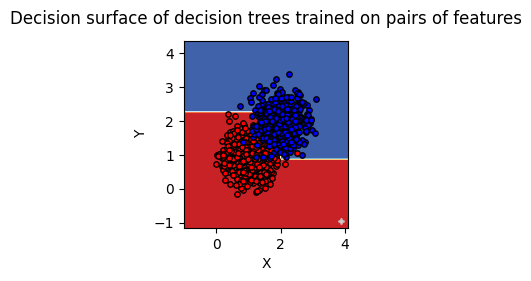

In [190]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
maxdepth = 20


# We only take the two corresponding features
X = (data,labels)[0]
y = (data,labels)[1]

# Train
clf = DecisionTreeClassifier(max_depth=maxdepth).fit(X, y)

# Plot the decision boundary
ax = plt.subplot(2, 3, 2)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel="X",
    ylabel="Y",
)
idx0 = np.where(labels == 0)
idx1 = np.where(labels == 1)
plt.scatter(data[idx0,0],data[idx0,1],color="r",          
            edgecolor="black",
            s=15,)
plt.scatter(data[idx1,0],data[idx1,1],color="b",      
            edgecolor="black",
            s=15,)
    # Plot the training points

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


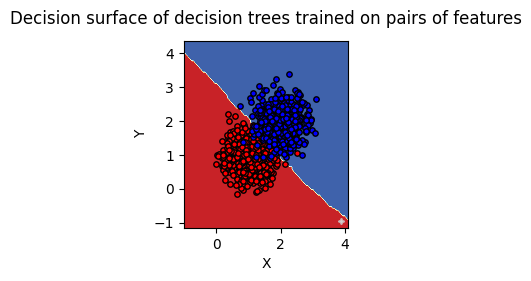

In [191]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
maxdepth = 20


# We only take the two corresponding features
X = (data,labels)[0]
y = (data,labels)[1]

# Train
# clf = GaussianProcessClassifier().fit(X, y)
# clf = GaussianNB().fit(X, y)
clf = KNeighborsClassifier().fit(X, y)


# Plot the decision boundary
ax = plt.subplot(2, 3, 2)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel="X",
    ylabel="Y",
)
idx0 = np.where(labels == 0)
idx1 = np.where(labels == 1)
plt.scatter(data[idx0,0],data[idx0,1],color="r",          
            edgecolor="black",
            s=15,)
plt.scatter(data[idx1,0],data[idx1,1],color="b",      
            edgecolor="black",
            s=15,)
    # Plot the training points

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

In [192]:
import jax.numpy as np
from jax import random
import plotly as plt

def sigmoid(X):
    return 1./(1 + np.exp(-X))

def add_bias(X):
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)


jax_key = random.PRNGKey(0)

def one_layer_init(input_size, output_size):
    return random.uniform(key=jax_key, shape=(output_size, input_size + 1), minval=-3, maxval=3)

def compute_layer(A_j, Theta_j):
    z = np.dot(A_j, Theta_j.T)
    return sigmoid(z)

def n_layer_init(layer_sizes):
    weights = []
    for l_idx in range(len(layer_sizes)-1):
        weights.append( one_layer_init(input_size=layer_sizes[l_idx], output_size=layer_sizes[l_idx+1]) )
    return weights

def forward_prop(X, Thetas):
    A0 = add_bias(X)
    outputs = [A0]
    for theta in Thetas[:-1]:
        A = compute_layer(outputs[-1], theta)
        outputs.append( add_bias(A) )
    return outputs + [compute_layer(outputs[-1], Thetas[-1])]

def output_delta(A_j, Y):
    return A_j - Y

def weight_update(A_j, Delta_next, Theta_j, rate):
    return Theta_j - rate * np.dot(Delta_next.T, A_j)

In [193]:
one_layer_init(2,1)

Array([[ 2.7919285, -1.1119101,  0.7981796]], dtype=float32)

[[ 5.2135575e-01  1.1861781e+00]
 [ 5.0120872e-01  6.9652778e-01]
 [ 1.2186182e+00  8.4778428e-01]
 [ 8.1017065e-01  7.6932102e-01]
 [ 1.5796635e-01  6.7328763e-01]
 [ 7.1708053e-01  9.5163769e-01]
 [ 1.2796340e+00  1.3871162e+00]
 [ 9.9942654e-01  7.3020238e-01]
 [ 6.0229927e-01  1.5760462e+00]
 [ 8.4906173e-01  8.7698603e-01]
 [ 1.6109103e+00  6.1502838e-01]
 [ 2.9928146e-03  9.9301362e-01]
 [ 1.1170567e+00  1.0435889e+00]
 [ 1.0911496e+00  1.0911491e+00]
 [ 1.7288743e+00  1.2438442e+00]
 [ 1.1246858e+00  2.4233218e-01]
 [ 1.3549936e+00  1.1831446e+00]
 [ 1.4703922e+00  9.1271365e-01]
 [ 1.2095481e+00  4.5591614e-01]
 [ 7.5157523e-01  5.8712524e-01]
 [ 5.0845510e-01  5.0644380e-01]
 [ 6.1721063e-01  7.0867634e-01]
 [ 1.4339586e+00  1.2273608e+00]
 [ 7.2561872e-01  1.5618114e+00]
 [ 8.8413262e-01  9.5767355e-01]
 [ 4.3589368e-01  8.7372440e-01]
 [ 1.3897216e+00  9.4009221e-01]
 [ 1.1112994e+00  1.7505327e+00]
 [ 1.5249847e+00  1.1588877e+00]
 [ 1.3001524e+00  8.4778315e-01]
 [ 8.94835

C:\Users\Rex\AppData\Local\Temp\ipykernel_8700\3834447311.py:17: DeprecationWarning: hstack requires ndarray or scalar arguments, got <class 'list'> at position 0. In a future JAX release this will be an error.
  labels= np.hstack(([0]*amount,[1]*amount))


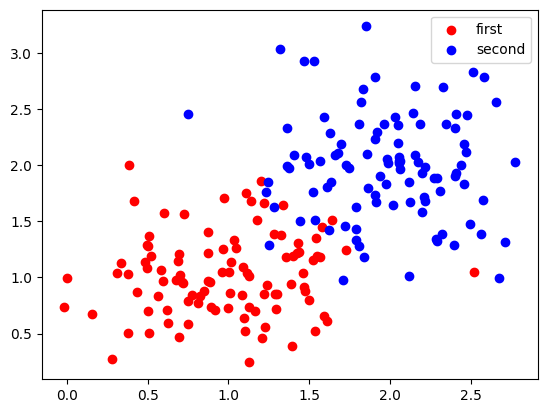

In [194]:
import matplotlib.pyplot as plt
amount = 100

last = data[-amount:]
first = data[:amount]

plt.scatter(first[:,0] ,first[:,1],color="r",label="first")


plt.scatter(last[:,0] ,last[:,1],color="b",label="second")
plt.legend()




print(np.vstack((first,last)))
labels= np.hstack(([0]*amount,[1]*amount))
print(labels)

In [195]:
forward_prop(np.vstack((first,last)),one_layer_init(2,1))

[Array([[ 1.0000000e+00,  5.2135575e-01,  1.1861781e+00],
        [ 1.0000000e+00,  5.0120872e-01,  6.9652778e-01],
        [ 1.0000000e+00,  1.2186182e+00,  8.4778428e-01],
        [ 1.0000000e+00,  8.1017065e-01,  7.6932102e-01],
        [ 1.0000000e+00,  1.5796635e-01,  6.7328763e-01],
        [ 1.0000000e+00,  7.1708053e-01,  9.5163769e-01],
        [ 1.0000000e+00,  1.2796340e+00,  1.3871162e+00],
        [ 1.0000000e+00,  9.9942654e-01,  7.3020238e-01],
        [ 1.0000000e+00,  6.0229927e-01,  1.5760462e+00],
        [ 1.0000000e+00,  8.4906173e-01,  8.7698603e-01],
        [ 1.0000000e+00,  1.6109103e+00,  6.1502838e-01],
        [ 1.0000000e+00,  2.9928146e-03,  9.9301362e-01],
        [ 1.0000000e+00,  1.1170567e+00,  1.0435889e+00],
        [ 1.0000000e+00,  1.0911496e+00,  1.0911491e+00],
        [ 1.0000000e+00,  1.7288743e+00,  1.2438442e+00],
        [ 1.0000000e+00,  1.1246858e+00,  2.4233218e-01],
        [ 1.0000000e+00,  1.3549936e+00,  1.1831446e+00],
        [ 1.00

In [196]:

output_delta(forward_prop(np.vstack((first,last)),one_layer_init(2,1))[1], labels)



Array([ 0.9592623 ,  0.94216484,  0.89221984,  0.92450196,  0.9590538 ,
        0.9401489 ,  0.9224606 ,  0.9058077 ,  0.9670798 ,  0.92742836,
        0.81632495,  0.972912  ,  0.91550887,  0.9205323 ,  0.86557484,
        0.85002583,  0.9028815 ,  0.86824083,  0.8594734 ,  0.9187047 ,
        0.93281806,  0.93531156,  0.8981787 ,  0.9620103 ,  0.9291199 ,
        0.9527834 ,  0.8804865 ,  0.9504288 ,  0.8830136 ,  0.8831867 ,
        0.91570795,  0.9636186 ,  0.9377917 ,  0.9288996 ,  0.8843869 ,
        0.883007  ,  0.94800025,  0.898835  ,  0.6942485 ,  0.97518176,
        0.9309497 ,  0.9495281 ,  0.91350347,  0.9628188 ,  0.9053038 ,
        0.88919216,  0.9438211 ,  0.9364415 ,  0.92837214,  0.93044186,
        0.9608102 ,  0.82565784,  0.81741065,  0.9250484 ,  0.93736535,
        0.9038562 ,  0.95571417,  0.8995394 ,  0.964971  ,  0.8797765 ,
        0.94417834,  0.9813887 ,  0.896217  ,  0.92722005,  0.9649648 ,
        0.929213  ,  0.93699247,  0.93161446,  0.8965603 ,  0.87

In [197]:
weight_update(
A_j=forward_prop(np.vstack((first,last)),one_layer_init(2,1))[1],
Delta_next=output_delta(forward_prop(np.vstack((first,last)),one_layer_init(2,1))[1], labels),
Theta_j=one_layer_init(2,1),
rate=0.9         
)


Array([[-64.264  , -68.16784, -66.25775]], dtype=float32)

In [218]:
Theta_j = one_layer_init(2,1)
for _ in range(3000):
    Theta_j=weight_update(
    A_j=forward_prop(np.vstack((first,last)),Theta_j)[0],
    Delta_next=output_delta(forward_prop(np.vstack((first,last)),Theta_j)[1], labels),
    Theta_j=Theta_j,
    rate=0.9         
    )

print(forward_prop(np.vstack((first,last)),Theta_j)[1])
print(labels)

print((Theta_j))


[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.1811400e-23 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.7000452e-08
 0.0000000e+00 1.7319316e-28 2.4726110e-35 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.1460205e-22 0.0000000e+00 0.0000000e+00
 0.0000000e+00 5.9013017e-38 3.3491110e-14 1.9775201e-21 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 8.9256438e-19 0.0000000e+00 9.5743598e-26 1.0000000e+00 0.0000000e+00
 0.0000000e+00 5.2358115e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.9350172e-22 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.2013316e-37
 2.7687824e-19 5.5113086e-23 2.3787828e-05 0.0000000e+00 4.7185351e-30
 0.0000000e+00 1.3445596e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.6252302e-08 7.2636541e-12 2.0901791e-18
 0.000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


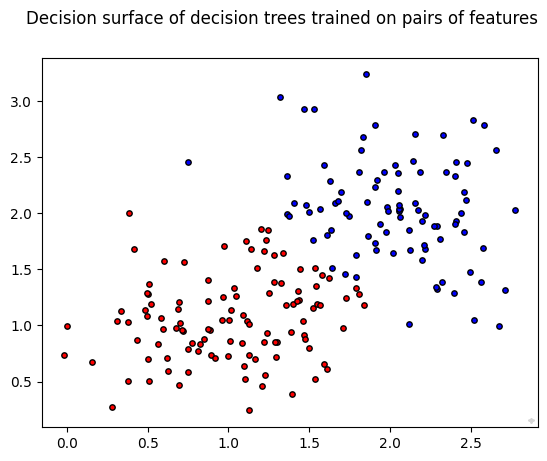

In [219]:

idx0 = np.where(labels <= 0.5)
idx1 = np.where(labels > 0.5)

idx0 = np.where(forward_prop(np.vstack((first,last)),Theta_j)[1] <= 0.5)
idx1 = np.where(forward_prop(np.vstack((first,last)),Theta_j)[1] > 0.5)

plt.scatter(np.vstack((first,last))[idx0,0],np.vstack((first,last))[idx0,1],color="r",          
            edgecolor="black",
            s=15,)
plt.scatter(np.vstack((first,last))[idx1,0],np.vstack((first,last))[idx1,1],color="b",      
            edgecolor="black",
            s=15,)
plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
